# ARIMA V1
## Doesn't work - (Ignore this file, it's just a test)
### Kept for reference

In [79]:
# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [80]:
# Leer los datos
df = pd.read_csv('data/train_cleaned_v2_1.csv', index_col='Time', parse_dates=True)
y = df['Close']

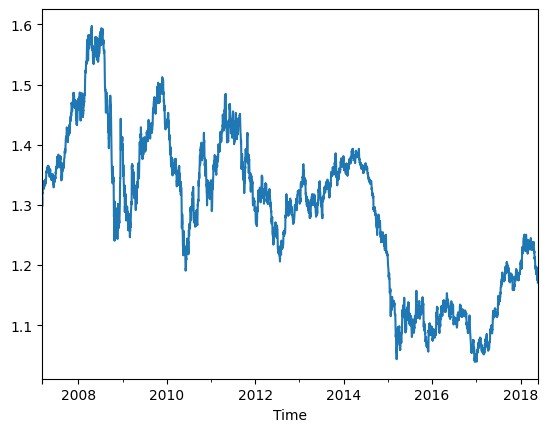

In [81]:
# Verificar la estacionariedad
y.plot()
plt.show()

In [82]:
# Usar la prueba de Dickey-Fuller aumentada
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# Si el p-valor es mayor que 0.05, los datos no son estacionarios y se necesita diferenciar

ADF Statistic: -1.600125
p-value: 0.483531


In [99]:
# Usar la función auto_arima con seasonal=False
model = auto_arima(y, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2972.802, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2980.330, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2978.354, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2978.353, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2982.239, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2976.332, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.378 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1492.120
Date:                Sun, 28 May 2023   AIC                          -2982.239
Time:                        20:18:05   BIC                          -2977.869
Sample:                    03-11-2007   HQIC                         -2980.536
    

In [100]:
# Ajustar el modelo
model.fit(y)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [101]:
# Importar los datos para la predicción
df_test = pd.read_csv('data/testing_set.csv', index_col='Time', parse_dates=True)
df_test

,test_idx,Open,High,Low,Close,Volume
Time,,,,,,
2018-05-29,0,1.16271,1.16394,1.15099,1.15343,336090
2018-05-30,1,1.15342,1.16759,1.15186,1.16627,318421
2018-05-31,2,1.16627,1.17243,1.16410,1.16938,285788
2018-06-01,3,1.16937,1.17178,1.16170,1.16584,253533
2018-06-03,4,1.16561,1.16794,1.16561,1.16757,14803
...,...,...,...,...,...,...
2023-03-09,1495,1.05466,1.05993,1.05378,1.05986,355706
2023-03-10,1496,1.05985,1.07004,1.05738,1.06387,563206
2023-03-12,1497,1.06808,1.07030,1.06740,1.06815,76674


In [38]:
df_test.index.min(), df_test.index.max()

(Timestamp('2018-05-29 00:00:00'), Timestamp('2023-03-14 00:00:00'))

In [39]:
start_train_date = df.index.min()
end_train_date = df.index.max()

In [40]:
start_train_date, end_train_date

(Timestamp('2007-03-07 00:00:00'), Timestamp('2018-05-23 00:00:00'))

In [91]:
# Importar la función train_test_split
from sklearn.model_selection import train_test_split
# Dividir los datos en entrenamiento y validación
train, val = train_test_split(y, test_size=0.2, shuffle=False)
# Verificar las fechas de cada subconjunto
print(train.index.min(), train.index.max())
print(val.index.min(), val.index.max())

2007-03-11 00:00:00 2016-02-21 00:00:00
2016-02-28 00:00:00 2018-05-20 00:00:00


In [102]:
# Convertir el índice en un índice de tipo datetime sin el argumento freq
y.index = pd.to_datetime(y.index)
# Asignar la frecuencia semanal al índice
y = y.asfreq('W')
# Ajustar el modelo con el nuevo índice
model.fit(y)
# Hacer las predicciones sin errores
pred = model.predict(n_periods=len(val))
pred = pd.Series(pred,index=val.index)

In [103]:
pred

Time
2016-02-28   NaN
2016-03-06   NaN
2016-03-13   NaN
2016-03-20   NaN
2016-03-27   NaN
              ..
2018-04-22   NaN
2018-04-29   NaN
2018-05-06   NaN
2018-05-13   NaN
2018-05-20   NaN
Freq: W-SUN, Length: 117, dtype: float64

In [27]:
# Calcular el MSE y el MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(val, pred)
mae = mean_absolute_error(val, pred)
print('MSE: %f' % mse)
print('MAE: %f' % mae)

ValueError: Input contains NaN.

In [ ]:
# Graficar los residuos
resid = model.resid()
resid.plot()
plt.show()

In [ ]:
# Usar la función acf para verificar la autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(resid)
plt.show()

In [ ]:
# Crear un rango de fechas desde el 2018-05-29 hasta el 2023-03-14 con frecuencia semanal
dates = pd.date_range(start='2018-05-29', end='2023-03-14', freq='W')
# Contar el número de elementos en el rango de fechas
n_periods = len(dates)
# Imprimir el resultado
print(n_periods)

In [ ]:
# Hacer predicciones futuras
forecast = model.predict(n_periods=n_periods)
forecast = pd.Series(forecast,index=pd.date_range(start='2021-01-01', end='2021-12-01', freq='MS'))

In [ ]:
# Graficar los resultados
plt.plot(y, label='Historical')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

---